# Comparing Regression Models

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import time

In [2]:
data=pd.read_csv('./kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,3,8,1987,0,98074,47.6168,-122.045


In [4]:
data=data.drop(['id', 'date', 'zipcode', 'lat', 'long'],axis=1)

In [5]:
feature_names=data.columns.difference(['price'])
feature_names

Index(['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'waterfront',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [6]:
X=data[feature_names]
y=data['price']
train_X,test_X,train_Y,test_Y=train_test_split(X,y, test_size=0.3, random_state=42)
print(train_X.shape, train_Y.shape,test_X.shape,test_Y.shape)

(15129, 8) (15129,) (6484, 8) (6484,)


## SVR (SVM Regression Model)

In [7]:
from sklearn import svm
start=time.time()
svm_regression_model=svm.LinearSVR(random_state=0,tol=1e-5)
svm_regression_model=svm_regression_model.fit(train_X,train_Y)
svm_predict=svm_regression_model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(svm_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 378126.70315222954
Time: 0.20 seconds


C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
C = 1.0 #Regularization parameter
svm_models = (svm.LinearSVR(C=C),
          svm.SVR(kernel='rbf', gamma=0.7, C=C),
          #svm.SVR(kernel='poly', degree=2, gamma='auto', C=C)
             )
svm_models = (clf.fit(train_X, train_Y) for clf in svm_models)
for svm_model in svm_models:
    svm_predict=svm_model.predict(test_X)
    print("RMSE: {}".format(sqrt(mean_squared_error(svm_predict, test_Y)))) # RMSE

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RMSE: 378667.25659344293
RMSE: 392099.02866287477


In [9]:
len(svm_regression_model.coef_)

8

## KNN Regressor

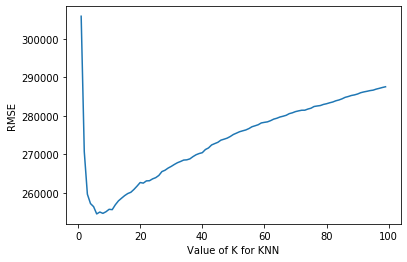

In [10]:
from sklearn.neighbors import KNeighborsRegressor
k_range=range(1,100)
k_scores=[]

for k in k_range:
    knn_regression_model=KNeighborsRegressor(n_neighbors=k)
    knn_regression_model.fit(train_X,train_Y)
    knn_predict=knn_regression_model.predict(test_X)
    score=(sqrt(mean_squared_error(knn_predict, test_Y)))# RMSE
    k_scores.append(score)
best_neighbor_count=np.argmin(k_scores)+1
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.show()

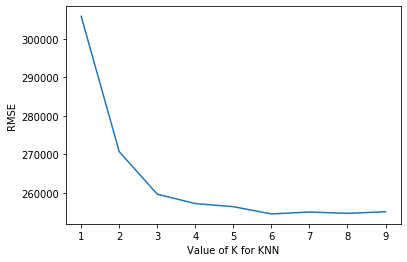

In [89]:
k_range=range(1,10,1)
k_scores=[]

for k in k_range:
    knn_regression_model=KNeighborsRegressor(n_neighbors=k)
    knn_regression_model.fit(train_X,train_Y)
    knn_predict=knn_regression_model.predict(test_X)
    score=(sqrt(mean_squared_error(knn_predict, test_Y)))# RMSE
    k_scores.append(score)
    
best_neighbor_count=np.argmin(k_scores)+1
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.show()


In [90]:
best_neighbor_count

6

In [13]:
from sklearn.neighbors import KNeighborsRegressor
start=time.time()
knn_regression_model=KNeighborsRegressor(n_neighbors=best_neighbor_count)
knn_regression_model.fit(train_X,train_Y)
knn_predict=knn_regression_model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(knn_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 254465.0875559736
Time: 0.36 seconds


In [14]:
knn_regression_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

## Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
start=time.time()
DT_Regression_Model=DecisionTreeRegressor(random_state=0)
DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
DT_Predict=DT_Regression_Model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(DT_Predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 242912.92128742934
Time: 0.02 seconds


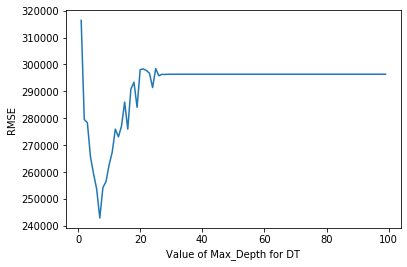

In [49]:
depth_range=range(1,100)
rmse_scores=[]

for depth in depth_range:
    DT_Regression_Model=DecisionTreeRegressor(random_state=0,max_depth=depth)
    DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
    DT_Predict=DT_Regression_Model.predict(test_X)
    score=(sqrt(mean_squared_error(DT_Predict, test_Y)))# RMSE
    rmse_scores.append(score)
    
best_max_depth=np,argmin(rmse_scores)+1
plt.plot(depth_range, rmse_scores)
plt.xlabel('Value of Max_Depth for DT')
plt.ylabel('RMSE')
plt.show()

In [50]:
print(best_max_depth)

7


In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
start=time.time()
DT_Regression_Model=DecisionTreeRegressor(random_state=0,max_depth=best_max_depth)
DT_Regression_Model=DT_Regression_Model.fit(train_X,train_Y)
DT_Predict=DT_Regression_Model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(DT_Predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 242912.92128742934
Time: 0.02 seconds


## NN(Neural Network) Regressor

In [59]:
from sklearn.neural_network import MLPRegressor
start=time.time()
NN_regression_model=MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(7,8),random_state=0)
NN_regression_model=NN_regression_model.fit(train_X,train_Y)
NN_predict=NN_regression_model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(NN_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 237612.2754520034
Time: 0.98 seconds


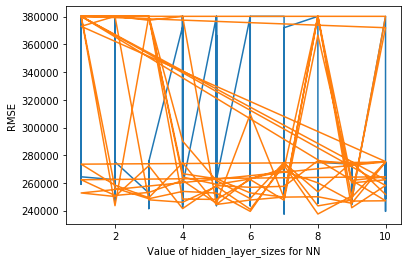

In [100]:
from itertools import product
hidden_nodes=range(1,11)
hidden_layers=range(1,11)

rmse_scores=list()
layer_products=list(product(hidden_layers,hidden_nodes))
for layer in layer_products:
    NN_regression_model=MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=layer,random_state=0)
    NN_regression_model=NN_regression_model.fit(train_X,train_Y)
    NN_predict=NN_regression_model.predict(test_X)
    score=sqrt(mean_squared_error(NN_predict, test_Y)) # RMSE
    rmse_scores.append(score)
    
best_hidden_layer=layer_products[np.argmin(rmse_scores)]

In [101]:
best_hidden_layer

(7, 8)

In [102]:
from sklearn.neural_network import MLPRegressor
start=time.time()
NN_regression_model=MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=best_hidden_layer,random_state=0)
NN_regression_model=NN_regression_model.fit(train_X,train_Y)
NN_predict=NN_regression_model.predict(test_X)
print("RMSE: {}".format(sqrt(mean_squared_error(NN_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 237612.2754520034
Time: 0.95 seconds


## Bagging Ensemble Regressor

In [61]:
from sklearn.linear_model import LinearRegression
# iteration method
# train_X 에 있는 데이터에 대해서 해당 크기 만큼 복원 추출을 진행한다.
data_indexes=[index for index in range(train_X.shape[0])]
bagging_predicts=list()
start=time.time()
for _ in range(30):
    random_data_indexes=np.random.choice(data_indexes,size=train_X.shape[0])
    data_X=train_X.iloc[random_data_indexes]
    data_Y=train_Y.iloc[random_data_indexes]
    
    
    Linear_Regression_model=LinearRegression()
    Linear_Regression_model=Linear_Regression_model.fit(data_X,data_Y)
    bagging_predicts.append(Linear_Regression_model.predict(test_X))
    
LR_predict=[]
for bagging_index in range(test_X.shape[0]):
    temp_result=list()
    for test_index in range(len(bagging_predicts)):
        temp_result.append(bagging_predicts[test_index][bagging_index])
    LR_predict.append(np.mean(temp_result))
    
print("RMSE: {}".format(sqrt(mean_squared_error(LR_predict, test_Y)))) # RMSE
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

      

RMSE: 239699.74862451924
Time: 0.35 seconds


In [67]:
from sklearn.ensemble import BaggingRegressor
start=time.time()
LR_Bagging_model = BaggingRegressor(base_estimator = LinearRegression(), # 선형회귀모형
                                 n_estimators = 30, # 10번 샘플링
                                 verbose = 1,
                                 random_state=0) # 학습 과정 표시
LR_Bagging_model = LR_Bagging_model.fit(train_X, train_Y) # 학습 진행
LR_Bagging_predict = LR_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(LR_Bagging_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 239751.332247993
Time: 0.18 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [86]:
from sklearn.ensemble import BaggingRegressor
start=time.time()
DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=7), # 선형회귀모형
                                 n_estimators = 240, # 10번 샘플링
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(DT_Bagging_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 221812.90357085614
Time: 2.45 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


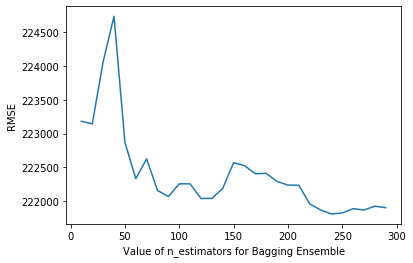

In [87]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=7), # 선형회귀모형
                                 n_estimators = sample_size, # 10번 샘플링
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
    DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
    DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=sqrt(mean_squared_error(DT_Bagging_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_sample=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Bagging Ensemble')
plt.ylabel('RMSE')
plt.show()

In [88]:
best_max_sample

240

In [94]:
from sklearn.ensemble import BaggingRegressor
start=time.time()
DT_Bagging_model = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth=best_max_depth), # 선형회귀모형
                                 n_estimators = best_max_sample, # 10번 샘플링
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(DT_Bagging_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 221812.90357085614
Time: 2.57 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


## Random Forest Tree Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
start=time.time()
RF_Regression_model = RandomForestRegressor(n_estimators = 30, # 20번 추정
                                             max_depth = 5, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(RF_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 229218.94048012476
Time: 0.23 seconds


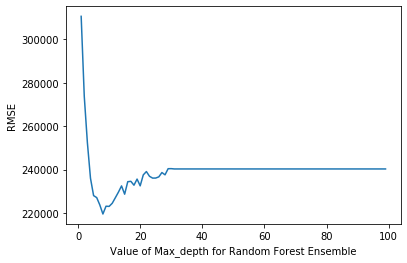

In [115]:
depth_ranges=range(1,100)
rmse_scores=[]

for depth in depth_ranges:
    RF_Regression_model = RandomForestRegressor(n_estimators = 10, # 10번 추정
                                             max_depth = depth, 
                                             random_state = 0) # 시드값 고정
    RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_depth_RF=np.argmin(rmse_scores)+1
plt.plot(depth_ranges, rmse_scores)
plt.xlabel('Value of Max_depth for Random Forest Ensemble')
plt.ylabel('RMSE')
plt.show()

In [116]:
best_max_depth_RF

8

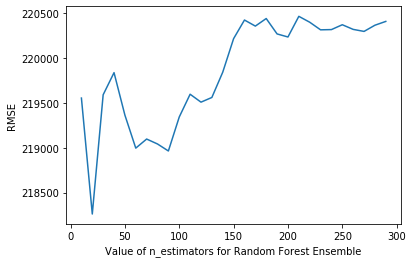

In [117]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    RF_Regression_model = RandomForestRegressor(n_estimators = sample_size, # 20번 추정
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
    RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_sample=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Random Forest Ensemble')
plt.ylabel('RMSE')
plt.show()

In [118]:
best_max_sample

20

In [119]:
from sklearn.ensemble import RandomForestRegressor
start=time.time()
RF_Regression_model = RandomForestRegressor(n_estimators = best_max_sample, # 20번 추정
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(RF_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 218262.59950310623
Time: 0.20 seconds


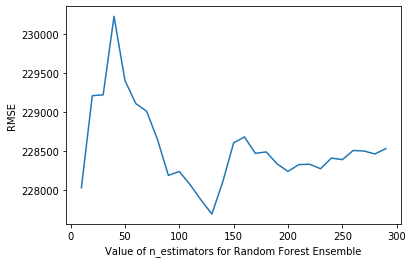

In [120]:
sample_ranges=range(10,300,10)
rmse_scores=[]

for sample_size in sample_ranges:
    RF_Regression_model = RandomForestRegressor(n_estimators = sample_size, # 20번 추정
                                             max_depth = 5, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
    RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_sample=np.argmin(rmse_scores)*10+10
plt.plot(sample_ranges, rmse_scores)
plt.xlabel('Value of n_estimators for Random Forest Ensemble')
plt.ylabel('RMSE')
plt.show()

In [121]:
best_max_sample

130

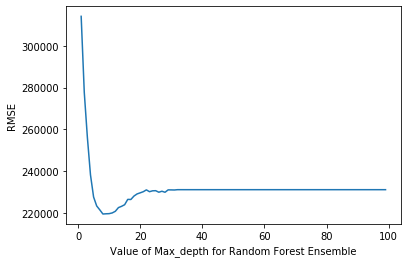

In [123]:
depth_ranges=range(1,100)
rmse_scores=[]

for depth in depth_ranges:
    RF_Regression_model = RandomForestRegressor(n_estimators = best_max_sample, # 10번 추정
                                             max_depth = depth, 
                                             random_state = 0) # 시드값 고정
    RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=sqrt(mean_squared_error(RF_predict, test_Y)) # RMSE 결과
    rmse_scores.append(score)
    
best_max_depth_RF=np.argmin(rmse_scores)+1
plt.plot(depth_ranges, rmse_scores)
plt.xlabel('Value of Max_depth for Random Forest Ensemble')
plt.ylabel('RMSE')
plt.show()

In [124]:
best_max_depth_RF

8

In [125]:
from sklearn.ensemble import RandomForestRegressor
start=time.time()
RF_Regression_model = RandomForestRegressor(n_estimators = best_max_sample, # 20번 추정
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Regression_model = RF_Regression_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(RF_predict, test_Y)))) # RMSE 결과
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

RMSE: 219562.4858909246
Time: 1.38 seconds
